Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

print("Cell processing Complete")

Cell processing Complete


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
def openCSV(filename) :
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = openCSV('enrollments.csv')
daily_engagement = openCSV('daily_engagement.csv')
project_submissions = openCSV('project_submissions.csv')

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

print("Cell processing Complete!")

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])
Cell processing Complete!


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
enrollments[0]   
print("Cell processing Complete!")

Cell processing Complete!


In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

print("Cell processing Complete!")

Cell processing Complete!


In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]
print("Cell processing Complete!")

Cell processing Complete!


Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']

print(daily_engagement[3]['account_key'])
print("Cell processing Complete!")

0
Cell processing Complete!


In [7]:
def get_unique_students(data):
    return set(data_rec['account_key'] for data_rec in data)
print("Cell processing Complete!")

Cell processing Complete!


In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = len(enrollments)             # Replace this with your code
enrollment_num_unique_students = len(get_unique_students(enrollments))  # Replace this with your code

engagement_num_rows = len(daily_engagement)              # Replace this with your code
engagement_num_unique_students = len(get_unique_students(daily_engagement)) # Replace this with your code

submission_num_rows = len(project_submissions)              # Replace this with your code
submission_num_unique_students = len(get_unique_students(project_submissions))  # Replace this with your code

print("enrollment_num_rows = " + str(enrollment_num_rows))
print("enrollment_num_unique_students = " + str(enrollment_num_unique_students))

print("engagement_num_rows = " + str(engagement_num_rows))
print("engagement_num_unique_students = " + str(engagement_num_unique_students))

print("submission_num_rows = " + str(submission_num_rows))
print("submission_num_unique_students = " + str(submission_num_unique_students))

print("Cell processing Complete!")

enrollment_num_rows = 1640
enrollment_num_unique_students = 1302
engagement_num_rows = 136240
engagement_num_unique_students = 1237
submission_num_rows = 3642
submission_num_unique_students = 743
Cell processing Complete!


## Problems in the Data

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    if(enrollment['account_key'] not in get_unique_students(daily_engagement)):
        print(enrollment)
        break
        
notEngaged = [x for x in enrollments if x['account_key'] not in get_unique_students(daily_engagement)]
print(len(notEngaged))

print([ x for x in notEngaged if x['days_to_cancel'] != 0])

print("Cell processing Complete!")       
                


OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
71
[OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)]), OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)]), OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])]
Cell processing Complete!


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
exception_num = 0
for enrollment in enrollments:
    if(enrollment['account_key'] not in get_unique_students(daily_engagement) and enrollment['days_to_cancel'] != 0):
        exception_num = exception_num + 1
        print(enrollment)
print(exception_num)

print("Cell processing Complete!")

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3
Cell processing Complete!


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
#udacity_test_accounts = set()
#for enrollment in enrollments:
 #   if enrollment['is_udacity']:
  #      udacity_test_accounts.add(enrollment['account_key'])
#print(len(udacity_test_accounts))

udacity_test_accounts = set(x['account_key'] for x in enrollments if x['is_udacity'])
print(udacity_test_accounts)

print("Cell processing Complete!")

{'312', '448', '818', '1069', '1101', '1304'}
Cell processing Complete!


In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

print("Cell processing Complete!")

Cell processing Complete!


In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

print (non_udacity_engagement[0])

print("Cell processing Complete!")


1622
135656
3634
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
Cell processing Complete!


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for rec in non_udacity_enrollments:
    if (not rec['is_canceled'] or rec['days_to_cancel'] > 7):
        account_key  = rec['account_key']
        enrollment_date = rec['join_date']
        if ((account_key not in paid_students) or (enrollment_date > paid_students[account_key])):
            paid_students[account_key] = enrollment_date
        
print(len(paid_students))

print("Cell processing Complete!")

995
Cell processing Complete!


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
#Note that paid students may have canceled from other courses before paying, 
#and the suggested solution will retain records from these other enrollments.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

print("Cell processing Complete!")

Cell processing Complete!


In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
    new_data = list()
    for data_point in data:
        if(data_point['account_key'] in paid_students):
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print("Cell processing Complete!")

Cell processing Complete!


In [17]:
for rec in paid_engagement:
    if rec['num_courses_visited'] > 0 :
        rec['has_visited'] = 1
    else:
        rec['has_visited'] = 0
        
print("Cell processing Complete!")

Cell processing Complete!


In [18]:
paid_engagement_in_first_week = [rec for rec in paid_engagement if within_one_week(paid_students[rec['account_key']],rec['utc_date'])]

print(len(paid_engagement_in_first_week))

print("Cell processing Complete!")

6919
Cell processing Complete!


## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
#engagement_by_account = defaultdict(list)
#for engagement_record in paid_engagement_in_first_week:
 #   account_key = engagement_record['account_key']
  #  engagement_by_account[account_key].append(engagement_record)
    
def group_data(data,keyname):
    group_by_account = defaultdict(list)
    for rec in data:
        key = rec[keyname]
        group_by_account[key].append(rec)
    return group_by_account

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

print("Cell processing Complete!")

Cell processing Complete!


In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
#total_minutes_by_account = {}
#for account_key, engagement_for_student in engagement_by_account.items():
 #   total_minutes = 0
  #  for engagement_record in engagement_for_student:
   #     total_minutes += engagement_record['total_minutes_visited']
    #total_minutes_by_account[account_key] = total_minutes
    
def sum_grouped_items(grouped_data, fieldname):
    total_sum_byKey= {}
    for key,data in grouped_data.items():
        total_sum=0
        for rec in data:
            total_sum += rec[fieldname]
        total_sum_byKey[key] = total_sum
    return total_sum_byKey

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

print("Cell processing Complete!")

Cell processing Complete!


Populating the interactive namespace from numpy and matplotlib
Mean:306.708326753
Standard deviation:412.996933409
Minimum:0.0
Maximum:3564.7332645


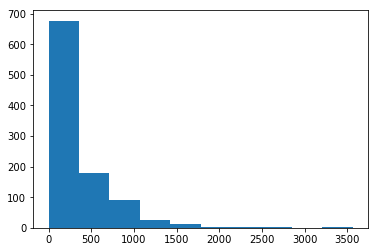

Cell processing Complete!


In [59]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

def summarize_data(data):
    total = list(data.values())
    print ('Mean:' + str(np.mean(total)))
    print ('Standard deviation:' + str(np.std(total)))
    print ('Minimum:' + str(np.min(total)))
    print ('Maximum:'+ str(np.max(total))) 
    plt.hist(total)
    plt.show()
 
summarize_data(total_minutes_by_account)
# Summarize the data about minutes spent in the classroom
#total_minutes = list(total_minutes_by_account.values())
#mean = np.mean(total_minutes)
#print ('Mean:' + str(np.mean(total_minutes)))
#print ('Standard deviation:' + str(np.std(total_minutes)))
#print ('Minimum:' + str(np.min(total_minutes)))
#print ('Maximum:'+ str(np.max(total_minutes)))

print("Cell processing Complete!")

## Debugging Data Analysis Code

In [22]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes= None
max_minutes = 0

for student,total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
print(student_with_max_minutes,max_minutes)    
for rec in engagement_by_account[student_with_max_minutes]:
    print(rec['utc_date'], rec['total_minutes_visited'])

print("Cell processing Complete!")


163 3564.7332644989997
2015-07-09 00:00:00 850.519339666
2015-07-10 00:00:00 872.633923334
2015-07-11 00:00:00 777.018903666
2015-07-12 00:00:00 294.568774
2015-07-13 00:00:00 471.2139785
2015-07-14 00:00:00 298.778345333
2015-07-15 00:00:00 0.0
Cell processing Complete!


## Lessons Completed in First Week

In [23]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
#lessons_completed_by_account = {}
#for account_key, engagement_for_student in engagement_by_account.items():
 #   lessons_completed = 0
  #  for engagement_record in engagement_for_student:
   #     lessons_completed += engagement_record['lessons_completed']
    #lessons_completed_by_account[account_key] = lessons_completed
    
import numpy as np

# Summarize the data about minutes spent in the classroom
#lessons_completed = list(lessons_completed_by_account.values())
#mean = np.mean(lessons_completed)
#print ('Mean:' + str(np.mean(lessons_completed)))
#print ('Standard deviation:' + str(np.std(lessons_completed)))
#print ('Minimum:' + str(np.min(lessons_completed)))
#print ('Maximum:'+ str(np.max(lessons_completed)))

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
summarize_data(lessons_completed_by_account)

student_with_max_lessons= None
max_lesssons = 0

for student,total_lessons in lessons_completed_by_account.items():
    if total_lessons > max_lesssons:
        max_lesssons = total_lessons
        student_with_max_lessons = student

print(student_with_max_lessons,max_lesssons)    
for rec in engagement_by_account[student_with_max_lessons]:
    print(rec)  
    
print("Cell processing Complete!")

Mean:1.63618090452
Standard deviation:3.00256129983
Minimum:0
Maximum:36
633 36
OrderedDict([('utc_date', datetime.datetime(2015, 7, 17, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 489.042620667), ('lessons_completed', 10), ('projects_completed', 0), ('account_key', '633'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 18, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 264.106566334), ('lessons_completed', 8), ('projects_completed', 0), ('account_key', '633'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 19, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 173.814019), ('lessons_completed', 3), ('projects_completed', 0), ('account_key', '633'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 20, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 259.304326334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '633'), ('has_visit

## Number of Visits in First Week

In [24]:
######################################
#                 10                 #
######################################
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
#Need to run this again
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
numOfVisits_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
summarize_data(numOfVisits_by_account)

print("Cell processing Complete!")

Mean:2.86733668342
Standard deviation:2.25519800292
Minimum:0
Maximum:7
Cell processing Complete!


## Splitting out Passing Students

In [33]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passed_accounts = set(rec['account_key'] for rec in paid_submissions if rec['lesson_key'] in subway_project_lesson_keys and rec['assigned_rating']
in ('PASSED','DISTINCTION'))
print(len(passed_accounts))

passing_engagement = []
non_passing_engagement = []

for rec in paid_engagement_in_first_week:
    if rec['account_key'] in passed_accounts:
        passing_engagement.append(rec)
    else:
        non_passing_engagement.append(rec)

print(len(passing_engagement))
print(len(non_passing_engagement))
print("Cell processing Complete!")

647
4527
2392
Cell processing Complete!


## Comparing the Two Student Groups

passing_engagement_total_minutes_visited!
Mean:394.586046484
Standard deviation:448.499519327
Minimum:0.0
Maximum:3564.7332645


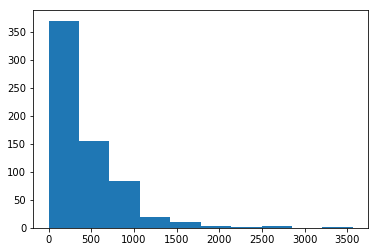

non_passing_engagement_byacctKeyt_total_minutes_visited!
Mean:143.326474267
Standard deviation:269.538619011
Minimum:0.0
Maximum:1768.52274933


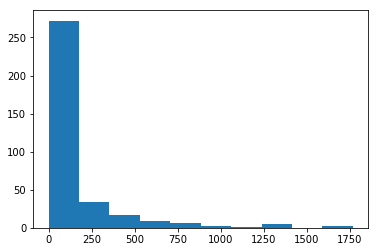

****************************************************************
passing_engagement_lessons_completed!
Mean:2.05255023184
Standard deviation:3.14222705558
Minimum:0
Maximum:36


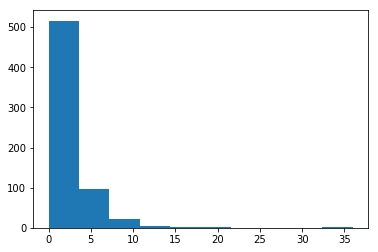

non_passing_engagement_byacctKey_lessons_completed!
Mean:0.862068965517
Standard deviation:2.54915994183
Minimum:0
Maximum:27


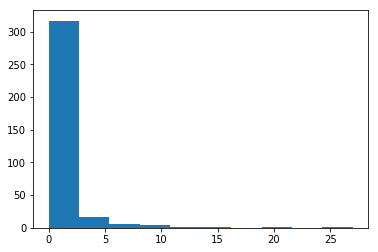

****************************************************************
passing_engagement_has_visited!
Mean:3.38485316847
Standard deviation:2.25882147092
Minimum:0
Maximum:7


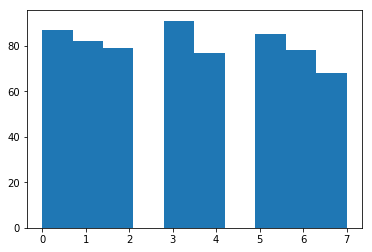

non_passing_engagement_byacctKey_has_visited!
Mean:1.90517241379
Standard deviation:1.90573144136
Minimum:0
Maximum:7


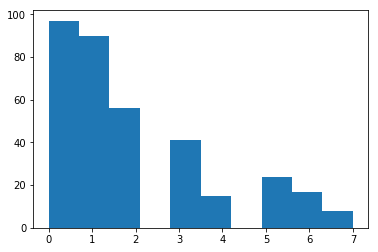

****************************************************************
Cell processing Complete!


In [60]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_byacctKey  = group_data(passing_engagement,'account_key')
passing_engagement_total_minutes_visited = sum_grouped_items(passing_engagement_byacctKey, 'total_minutes_visited')
passing_engagement_lessons_completed = sum_grouped_items(passing_engagement_byacctKey, 'lessons_completed')
passing_engagement_has_visited = sum_grouped_items(passing_engagement_byacctKey, 'has_visited')

non_passing_engagement_byacctKey  = group_data(non_passing_engagement,'account_key')
non_passing_engagement_byacctKeyt_total_minutes_visited = sum_grouped_items(non_passing_engagement_byacctKey, 'total_minutes_visited')
non_passing_engagement_byacctKey_lessons_completed = sum_grouped_items(non_passing_engagement_byacctKey, 'lessons_completed')
non_passing_engagement_byacctKey_has_visited = sum_grouped_items(non_passing_engagement_byacctKey, 'has_visited')


print("passing_engagement_total_minutes_visited!")
summarize_data(passing_engagement_total_minutes_visited)
print("non_passing_engagement_byacctKeyt_total_minutes_visited!")
summarize_data(non_passing_engagement_byacctKeyt_total_minutes_visited)
print("****************************************************************")
print("passing_engagement_lessons_completed!")
summarize_data(passing_engagement_lessons_completed)
print("non_passing_engagement_byacctKey_lessons_completed!")
summarize_data(non_passing_engagement_byacctKey_lessons_completed)
print("****************************************************************")
print("passing_engagement_has_visited!")
summarize_data(passing_engagement_has_visited)
print("non_passing_engagement_byacctKey_has_visited!")
summarize_data(non_passing_engagement_byacctKey_has_visited)
print("****************************************************************")
print("Cell processing Complete!")



## Making Histograms

passing_engagement_total_minutes_visited!
Mean:394.586046484
Standard deviation:448.499519327
Minimum:0.0
Maximum:3564.7332645


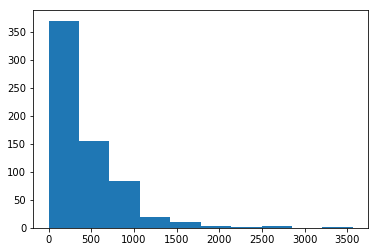

non_passing_engagement_byacctKeyt_total_minutes_visited!
Mean:143.326474267
Standard deviation:269.538619011
Minimum:0.0
Maximum:1768.52274933


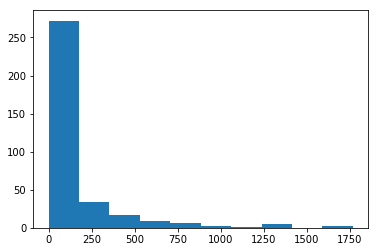

****************************************************************
passing_engagement_lessons_completed!
Mean:2.05255023184
Standard deviation:3.14222705558
Minimum:0
Maximum:36


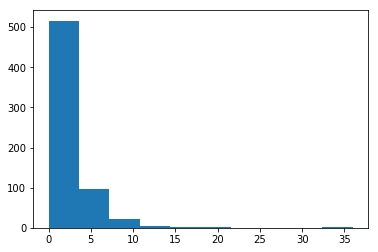

non_passing_engagement_byacctKey_lessons_completed!
Mean:0.862068965517
Standard deviation:2.54915994183
Minimum:0
Maximum:27


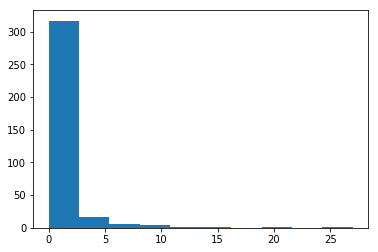

****************************************************************
passing_engagement_has_visited!
Mean:3.38485316847
Standard deviation:2.25882147092
Minimum:0
Maximum:7


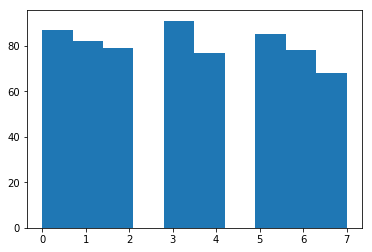

non_passing_engagement_byacctKey_has_visited!
Mean:1.90517241379
Standard deviation:1.90573144136
Minimum:0
Maximum:7


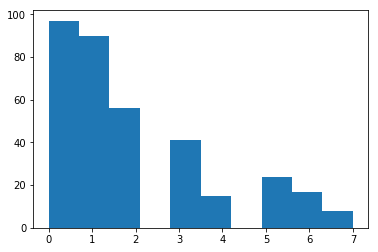

****************************************************************
Cell processing Complete!


In [61]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

print("passing_engagement_total_minutes_visited!")
summarize_data(passing_engagement_total_minutes_visited)
print("non_passing_engagement_byacctKeyt_total_minutes_visited!")
summarize_data(non_passing_engagement_byacctKeyt_total_minutes_visited)
print("****************************************************************")
print("passing_engagement_lessons_completed!")
summarize_data(passing_engagement_lessons_completed)
print("non_passing_engagement_byacctKey_lessons_completed!")
summarize_data(non_passing_engagement_byacctKey_lessons_completed)
print("****************************************************************")
print("passing_engagement_has_visited!")
summarize_data(passing_engagement_has_visited)
print("non_passing_engagement_byacctKey_has_visited!")
summarize_data(non_passing_engagement_byacctKey_has_visited)
print("****************************************************************")
print("Cell processing Complete!")



## Improving Plots and Sharing Findings

Populating the interactive namespace from numpy and matplotlib


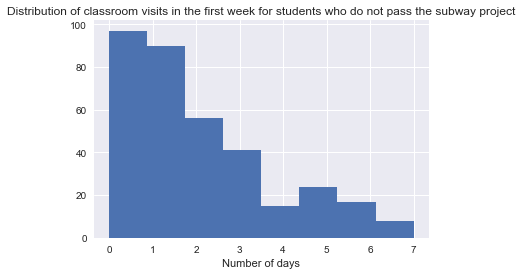

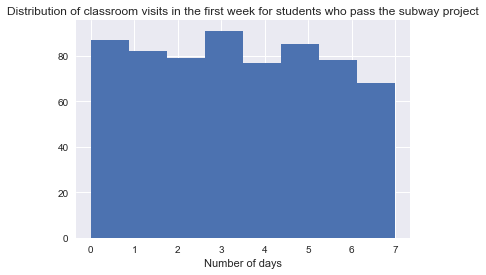

Cell processing Complete!


In [67]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns
import numpy as np
%pylab inline
import matplotlib.pyplot as plt


plt.hist(list(non_passing_engagement_byacctKey_has_visited.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')
plt.show()
plt.hist(list(passing_engagement_has_visited.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')
plt.show()
print("Cell processing Complete!")